# Number_Recognition

In [20]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Load and Preprocess the MNIST dataset 

In [25]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [24]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Display dataset information 

In [26]:
print("Number of training samples:", len(x_train))
print("Number of testing samples:", len(x_test))
print("Shape of an individual sample:", x_train[0].shape)

Number of training samples: 60000
Number of testing samples: 10000
Shape of an individual sample: (28, 28)


## Visualize a Sample Image 

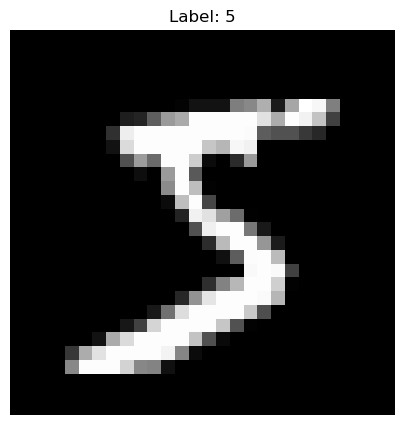

In [27]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

## Scale the data so that the values are from 0 - 1 

In [28]:
x_train = x_train / 255
x_test = x_test / 255

In [29]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Flatten the Data 

In [30]:
x_train_flattened = x_train.reshape(len(x_train), -1)
x_test_flattened = x_test.reshape(len(x_test), -1)

## Build and Compile the Simple Model 

In [32]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Train the Model
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4634 - accuracy: 0.8798
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3034 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2830 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2728 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.9257


## Evaluate the Model on Test Data 

In [33]:
test_loss, test_accuracy = model.evaluate(x_test_flattened, y_test)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")
model.fit(x_train_flattened, y_train, epochs=5)

313/313 [==============================] - 1s 2ms/step - loss: 0.2677 - accuracy: 0.9263
Test loss: 0.2677, Test accuracy: 0.9263
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2616 - accuracy: 0.9275
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2582 - accuracy: 0.9283
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2557 - accuracy: 0.9290
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2525 - accuracy: 0.9296
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2504 - accuracy: 0.9298


## Make Predictions on Test Data 

In [35]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 0s 997us/step


## Create Confusion Matrix 

In [37]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

## Plot Confusion Matrix 

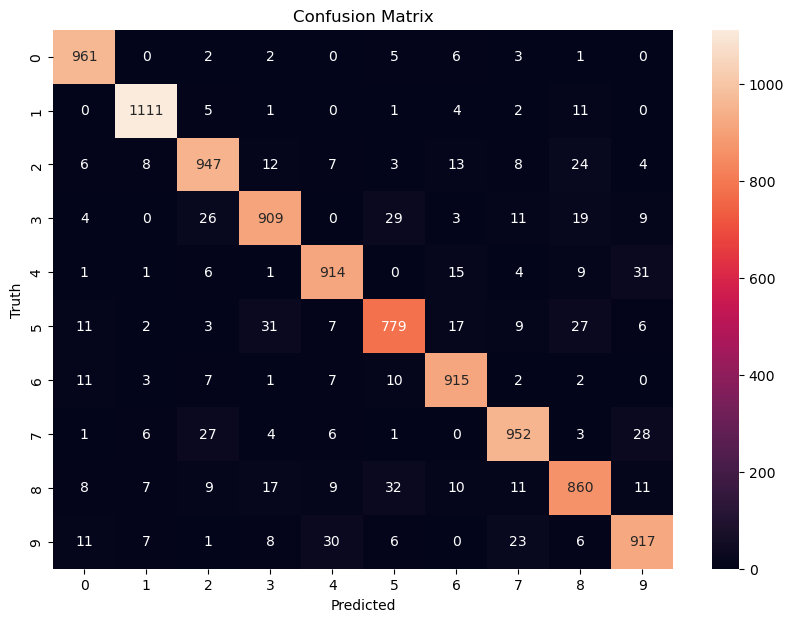

In [38]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

## Build and Compile a Model with Hidden Layer 

In [40]:
# Build and Compile a Model with Hidden Layer
model_with_hidden = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_with_hidden.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Train the Model with Hidden Layer
model_with_hidden.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2731 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1221 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0840 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0635 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0505 - accuracy: 0.9842


## Evaluate the Model with Hidden Layer on Test Data 

In [16]:
hidden_test_loss, hidden_test_accuracy = model_with_hidden.evaluate(x_test_flattened, y_test)
print(f"Test accuracy with hidden layer: {hidden_test_accuracy:.4f}")

313/313 [==============================] - 1s 1ms/step - loss: 0.0806 - accuracy: 0.9750
Test accuracy with hidden layer: 0.9750


In [17]:
# Display Sample Predictions
sample_indices = np.random.randint(0, len(x_test), size=5)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

# Flatten the sample images
sample_images_flattened = sample_images.reshape(len(sample_images), -1)

sample_predictions = model_with_hidden.predict(sample_images_flattened)
predicted_classes = np.argmax(sample_predictions, axis=1)

1/1 [==============================] - 0s 60ms/step


## Display Sample Images, True Labels, and Predicted Labels 

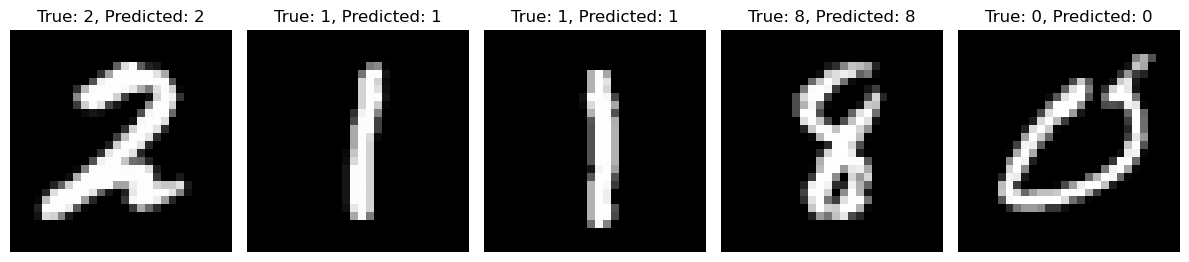

In [18]:
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"True: {sample_labels[i]}, Predicted: {predicted_classes[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# THANK YOU!

## https://github.com/anujtiwari21?tab=repositories